In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import pickle
import seaborn as sns
import tqdm

In [2]:
# FH_AD_ChrGenePCA_00_GS10_v1_2500bp_summary
exp_list = [
    {'name': 'GenePCA_00_GS10_v1', 'evr': 0.7},
    {'name': 'GenePCA_00_GS10_v2', 'evr': 0.9}]

In [4]:
def get_num_snps(pca_folder, pca_fname):
    with open(f'{pca_folder}/{pca_fname}', 'rb') as f:
        pca = pickle.load(f)
    num_snps = pca.components_.shape[1]
    return num_snps

for exp_dict in exp_list:
    summ_df = pd.read_csv(f'./NN_Logs/FH_AD_Chr{exp_dict["name"]}_2500bp_summary.csv')
    meta_agg = []
    for chrom in tqdm.tqdm(range(1, 23)):
        pca_folder = f'/mnt/sdf/GWANN_PCA_models/EVR_{exp_dict["evr"]}/{chrom}'
        meta = pd.read_csv(f'{pca_folder}/metadata.txt', sep='\t', header=None)
        meta.columns = ['pca_fname', 'evr']
        meta['num_snps'] = meta['pca_fname'].apply(lambda x: get_num_snps(pca_folder, x)).values
        meta['Gene'] = meta['pca_fname'].apply(lambda x: x.replace('pca_', '').replace('.pkl', '')).values
        meta['Gene'] = meta['Gene'].apply(lambda x: f'{x.split("_")[0]}:{x.split("_")[1]}-{x.split("_")[2]}').values
        meta = meta[['Gene', 'num_snps', 'evr']]
        meta_agg.append(meta)
    meta_agg = pd.concat(meta_agg)
    summ_df = pd.merge(summ_df, meta_agg, on='Gene', how='inner')
    summ_df = summ_df[['Gene', 'Chrom', 'num_snps', 'evr', 'Acc']]
    summ_df['EVR_range'] = f'{exp_dict["evr"]:.2f}-{exp_dict["evr"]+0.05:.2f}'
    print(summ_df.head())
    exp_dict['summ_df'] = summ_df
    

100%|██████████| 22/22 [00:03<00:00,  6.76it/s]


                    Gene  num_snps       evr
7   14:37403696-43854253     20670  0.723545
1   13:53240546-61019354     20000  0.700800
19   6:55206742-64891123     20000  0.862836
22   6:74871231-81506932     20000  0.726742
23   6:81507077-88196183     20000  0.733573
                  Gene  Chrom  num_snps       evr       Acc  EVR_range
0  1:17643054-19198141      1      5097  0.704788  0.497862  0.70-0.75
1  1:11963692-14687947      1      5828  0.705810  0.504869  0.70-0.75
2  1:19198414-21773762      1      7837  0.742515  0.494181  0.70-0.75
3    1:3257739-4645928      1      5238  0.736471  0.496496  0.70-0.75
4  1:21773894-24382484      1      6912  0.720999  0.497744  0.70-0.75


100%|██████████| 22/22 [00:08<00:00,  2.51it/s]

                    Gene  num_snps       evr
40   6:31263721-33099472     20000  0.914548
51  11:46359645-55761786     20000  0.976424
47  12:32708726-40826687     16415  0.906812
76   7:57797912-66986712     14814  0.932724
39   6:29659355-31263706     14361  0.945400
                Gene  Chrom  num_snps       evr       Acc  EVR_range
0  1:1689762-2559734      1      2375  0.899994  0.491746  0.90-0.95
1  1:4938808-5382005      1      1822  0.922236  0.494953  0.90-0.95
2   1:717587-1689164      1      2475  0.906999  0.496200  0.90-0.95
3  1:4159397-4535051      1      1822  0.935516  0.496972  0.90-0.95
4  1:4535148-4938510      1      1822  0.903611  0.501128  0.90-0.95


In [23]:
plot_df = []
for exp_dict in exp_list:
    plot_df.append(exp_dict['summ_df'])
plot_df = pd.concat(plot_df).reset_index(drop=True)

### EVR_range vs SNP count

<AxesSubplot:xlabel='num_snps', ylabel='Count'>

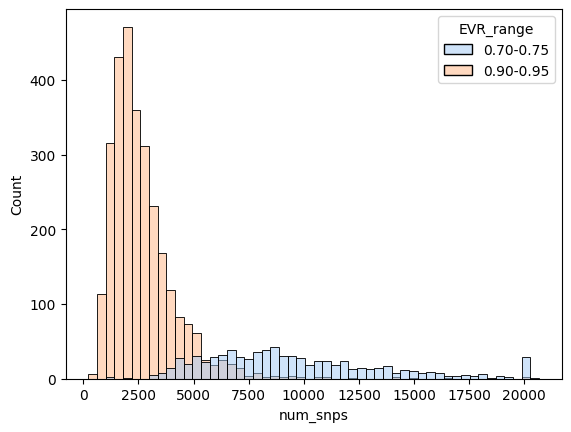

In [24]:
sns.histplot(data=plot_df, x='num_snps', alpha=0.5, 
             hue='EVR_range', palette='pastel')

### EVR vs Acc (facetted by evr range)

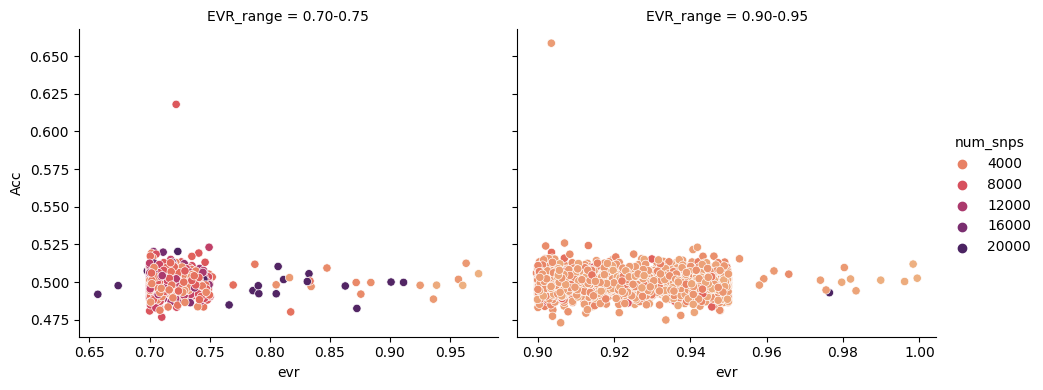

In [25]:
fg = sns.FacetGrid(data=plot_df, col='EVR_range', sharey=True, sharex=False, height=4, aspect=1.2)
fg.map_dataframe(sns.scatterplot, x='evr', y='Acc', hue='num_snps', alpha=1, palette='flare')
fg.add_legend(title='num_snps')
plt.show()


### Manhattan

                       Gene       Acc  EVR_range
748    19:41879134-45585167  0.617934  0.70-0.75
98    2:134271948-138625778  0.523100  0.70-0.75
82      2:50925528-55492154  0.520309  0.70-0.75
598    14:37403696-43854253  0.520309  0.70-0.75
22      1:69132867-76352405  0.519834  0.70-0.75
337     7:25622373-28543233  0.519240  0.70-0.75
273   5:172646003-174217637  0.519181  0.70-0.75
375       8:5472656-6783636  0.518527  0.70-0.75
566  12:125256281-127244868  0.517221  0.70-0.75
629    15:57857994-60262603  0.517043  0.70-0.75
448   9:136952741-138121346  0.516093  0.70-0.75
286     6:17347453-20534974  0.515024  0.70-0.75
409   8:137912692-140356448  0.513717  0.70-0.75
58    1:237394084-239679435  0.513361  0.70-0.75
470    10:64049576-68698029  0.513183  0.70-0.75
444   9:126572394-130356316  0.513123  0.70-0.75
227   4:186701575-187984972  0.513005  0.70-0.75
423     9:26153662-28491651  0.512886  0.70-0.75
719    18:44246391-46509908  0.512827  0.70-0.75
287     6:20535418-2

/home/upamanyu/.pyenv/versions/3.9.15/envs/GWANN_3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (22) than needed (21), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/upamanyu/.pyenv/versions/3.9.15/envs/GWANN_3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: The palette list has more values (22) than needed (21), which may not be intended.
  func(*plot_args, **plot_kwargs)


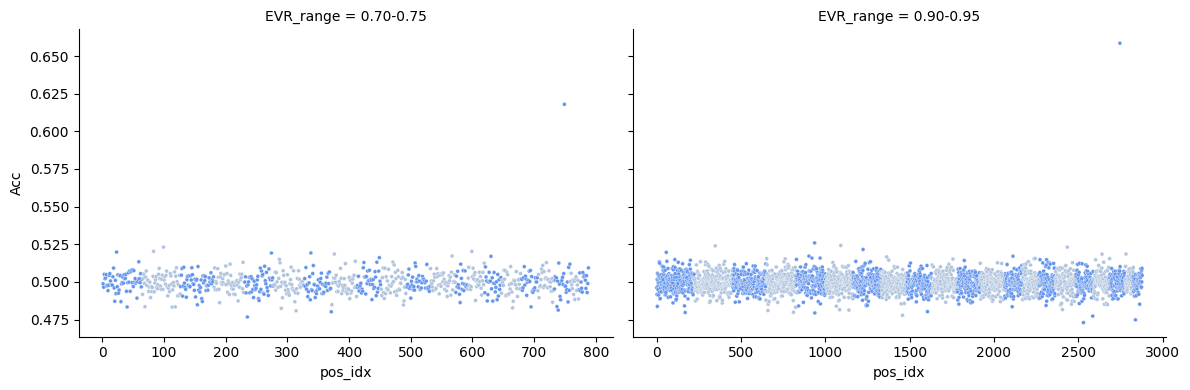

In [52]:
def pos(region):
    start = int(region.split(':')[1].split('-')[0])
    end = int(region.split(':')[1].split('-')[1])
    pos = (start+end)//2
    return pos
    
manhattan_df = plot_df.copy()
manhattan_df['pos'] = manhattan_df['Gene'].apply(lambda x: pos(x)).values
manhattan_df_new = []
for g, idx in manhattan_df.groupby('EVR_range').groups.items():
    tdf = manhattan_df.loc[idx].copy()
    tdf.sort_values(['Chrom', 'pos'], inplace=True)
    tdf.reset_index(drop=True, inplace=True)
    tdf['pos_idx'] = tdf.index.values + 1
    print(tdf.sort_values('Acc', ascending=False)[['Gene', 'Acc', 'EVR_range']].head(20))
    manhattan_df_new.append(tdf)

manhattan_df_new = pd.concat(manhattan_df_new)
fg = sns.FacetGrid(data=manhattan_df_new, col='EVR_range', sharey=True, sharex=False, 
                   height=4, aspect=1.5)
fg.map_dataframe(sns.scatterplot, x='pos_idx', y='Acc', hue='Chrom', alpha=1, s=8,
                 palette=sns.color_palette(['#6495ED', '#B0C4DE']*11))